<a href="https://colab.research.google.com/github/dangils/Data-Analysis-ML/blob/main/auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [3]:
import numpy as np
import pandas as pd


data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_GasMileage/auto-mpg.csv',header = 0, engine='python')
print('데이터셋 크기 : ', data_df.shape)
data_df.head()
# csv 데이터 확인
# 데이터셋은 398개 이며 컬럼은 9개

데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data_df = data_df.drop(['car_name','origin','horsepower'],axis=1, inplace = False)
                                                      # drop 메서드를 axis=1(열을 기준으로 수행) // axis=0(행을 기준으로 수행)
                                                      # inplace = False로 설정하여 메서드 수행 후 원본은 유지하며 결과값만 산출
print('데이터셋 크기 : ', data_df.shape)
data_df.head()

데이터셋 크기 :  (398, 6)


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


# Data Anaysis and Machine Training

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# X, Y 분할
y = data_df['mpg']
x = data_df.drop(['mpg'], axis = 1, inplace=False)

# 훈령용 데이터와 평가용 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

# 선형 회귀 분석 모델 생성
lr = LinearRegression()

# 분석 모델 훈련
lr.fit(x_train, y_train)

# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 y_predict 산출
y_predict = lr.predict(x_test)


- 데이터 셋 분리 작업을 위한 train_test_split 수행
- 성능 측정을 위한 평가 지표인 mean_squared_error, r2_score 임포트


> 자동차 연비를 예측하는 것이 프로젝트의 목표이므로, mpg를 회귀식의 종속 변수 y로 설정,
 mgp를 제외한 나머지를 독립 변수 x로 설정

- test_size=0.3, train_test_split() → 데이터를 7:3 비율로 분할하여 학습 데이터와 평가 데이터로 설정  
<br>
<hr>
<br>

- 분석 모델 생성 후 x_train 과 y_train 데이터로 학습 수행
- 평가 데이터 x_test 로 예측 수행하여 예측값(y_predict) 산출






In [18]:
# 평가 지표를 통해 분석 모델 평가 및 회귀 계수를 확인하여 자동차 연비에 끼치는 피처의 영향을 분석

mse = mean_squared_error(y_test , y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, y_predict)))


MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [19]:
print('y 절편 값 : ', np.round(lr.intercept_,2))
print('회귀 계수 값: ', np.round(lr.coef_,2))


y 절편 값 :  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [20]:
coef = pd.Series(data = np.round(lr.coef_,2), index = x.columns)
coef.sort_values(ascending = False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

회귀 분석은 지도학습 이므로 평가 데이터 x에 대한 y를 이미 알고 있음



# Data Visualization

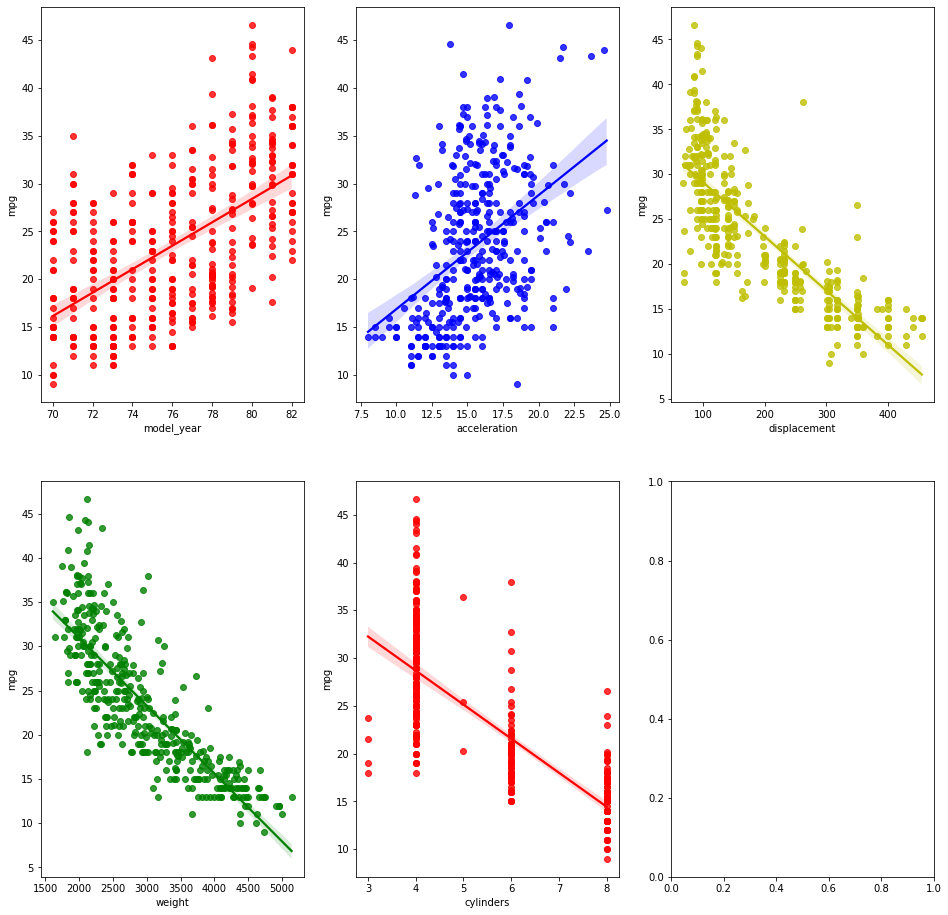

In [21]:
# 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 2)
x_features = ['model_year', 'acceleration','displacement','weight','cylinders']
plot_color = ['r','b','y','g','r']
for i,feature in enumerate(x_features) : 
  row = int(i/3)
  col = i%3
  sns.regplot(x = feature, y='mpg',data = data_df, ax = axs[row][col], color=plot_color[i])

✔ 시각화된 결과를 보면, model_year가 클수록(최신 모델) 그리고 acceleration이 높을수록 자동차 연비가 높다. 반대로 displacement, weight, cylinders가 낮을수록 자동차 연비가 높다. 

In [22]:
print("연비를 예측할 차량의 정보를 입력해 주세요!")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1, model_year_1]])

print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)

연비를 예측할 차량의 정보를 입력해 주세요!
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99
이 자동차의 예상 연비(MPG)는 41.32입니다.
